In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("Global_Education.csv", encoding='latin1')


In [3]:
dataset.head()

,Countries and areas,Latitude,Longitude,OOSR_Pre0Primary_Age_Male,OOSR_Pre0Primary_Age_Female,OOSR_Primary_Age_Male,OOSR_Primary_Age_Female,OOSR_Lower_Secondary_Age_Male,OOSR_Lower_Secondary_Age_Female,OOSR_Upper_Secondary_Age_Male,...,Primary_End_Proficiency_Reading,Primary_End_Proficiency_Math,Lower_Secondary_End_Proficiency_Reading,Lower_Secondary_End_Proficiency_Math,Youth_15_24_Literacy_Rate_Male,Youth_15_24_Literacy_Rate_Female,Birth_Rate,Gross_Primary_Education_Enrollment,Gross_Tertiary_Education_Enrollment,Unemployment_Rate
0,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,44,...,13,11,0,0,74,56,32.49,104.0,9.7,11.12
1,Albania,41.153332,20.168331,4,2,6,3,6,1,21,...,0,0,48,58,99,100,11.78,107.0,55.0,12.33
2,Algeria,28.033886,1.659626,0,0,0,0,0,0,0,...,0,0,21,19,98,97,24.28,109.9,51.4,11.70
3,Andorra,42.506285,1.521801,0,0,0,0,0,0,0,...,0,0,0,0,0,0,7.20,106.4,0.0,0.00
4,Angola,11.202692,17.873887,31,39,0,0,0,0,0,...,0,0,0,0,0,0,40.73,113.5,9.3,6.89


In [4]:
dataset.shape

(202, 29)

In [5]:
dataset.dtypes

Countries and areas                         object
Latitude                                   float64
Longitude                                  float64
OOSR_Pre0Primary_Age_Male                    int64
OOSR_Pre0Primary_Age_Female                  int64
OOSR_Primary_Age_Male                        int64
OOSR_Primary_Age_Female                      int64
OOSR_Lower_Secondary_Age_Male                int64
OOSR_Lower_Secondary_Age_Female              int64
OOSR_Upper_Secondary_Age_Male                int64
OOSR_Upper_Secondary_Age_Female              int64
Completion_Rate_Primary_Male                 int64
Completion_Rate_Primary_Female               int64
Completion_Rate_Lower_Secondary_Male         int64
Completion_Rate_Lower_Secondary_Female       int64
Completion_Rate_Upper_Secondary_Male         int64
Completion_Rate_Upper_Secondary_Female       int64
Grade_2_3_Proficiency_Reading                int64
Grade_2_3_Proficiency_Math                   int64
Primary_End_Proficiency_Reading

In [6]:
dataset.isnull().sum()

Countries and areas                        0
Latitude                                   0
Longitude                                  0
OOSR_Pre0Primary_Age_Male                  0
OOSR_Pre0Primary_Age_Female                0
OOSR_Primary_Age_Male                      0
OOSR_Primary_Age_Female                    0
OOSR_Lower_Secondary_Age_Male              0
OOSR_Lower_Secondary_Age_Female            0
OOSR_Upper_Secondary_Age_Male              0
OOSR_Upper_Secondary_Age_Female            0
Completion_Rate_Primary_Male               0
Completion_Rate_Primary_Female             0
Completion_Rate_Lower_Secondary_Male       0
Completion_Rate_Lower_Secondary_Female     0
Completion_Rate_Upper_Secondary_Male       0
Completion_Rate_Upper_Secondary_Female     0
Grade_2_3_Proficiency_Reading              0
Grade_2_3_Proficiency_Math                 0
Primary_End_Proficiency_Reading            0
Primary_End_Proficiency_Math               0
Lower_Secondary_End_Proficiency_Reading    0
Lower_Seco

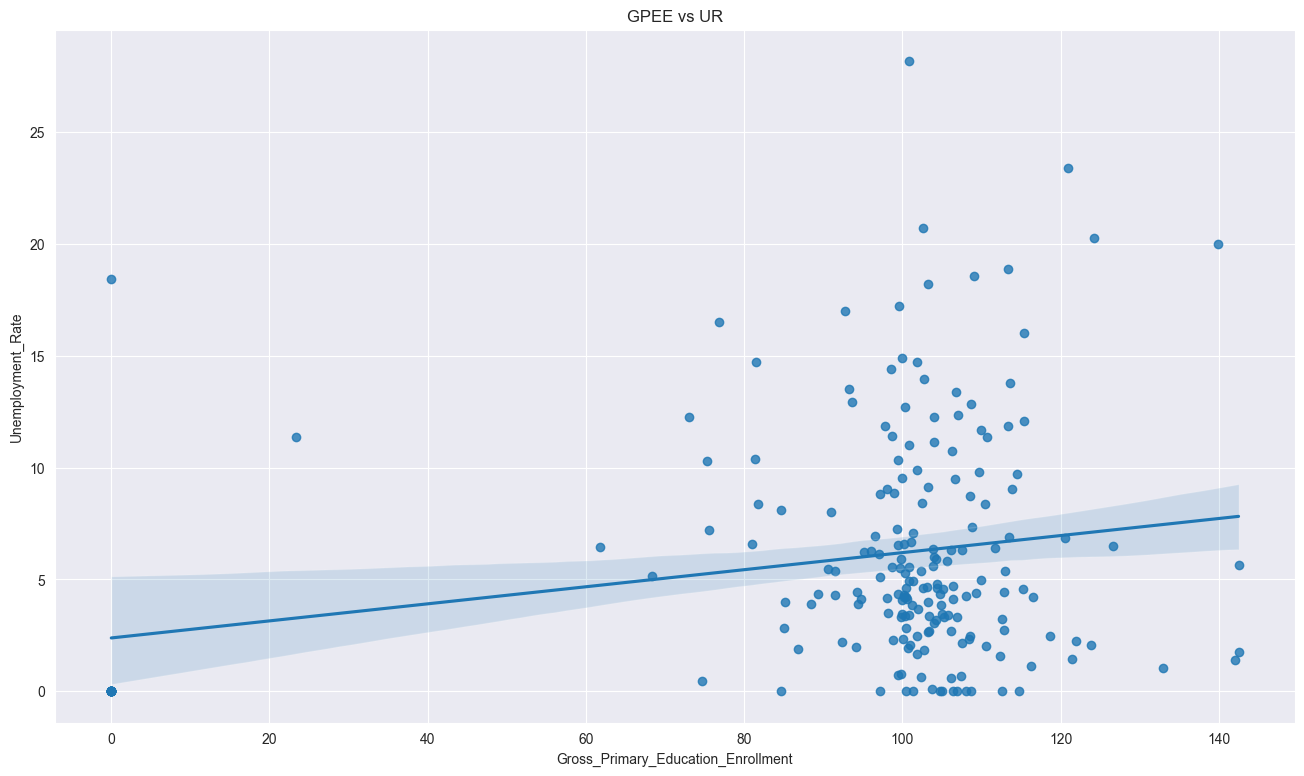

In [8]:
plt.figure(figsize=(16, 9))

sns.set_style('darkgrid')
sns.regplot(x='Gross_Primary_Education_Enrollment', y ='Unemployment_Rate', data=dataset)
plt.title("GPEE vs UR")

plt.show()

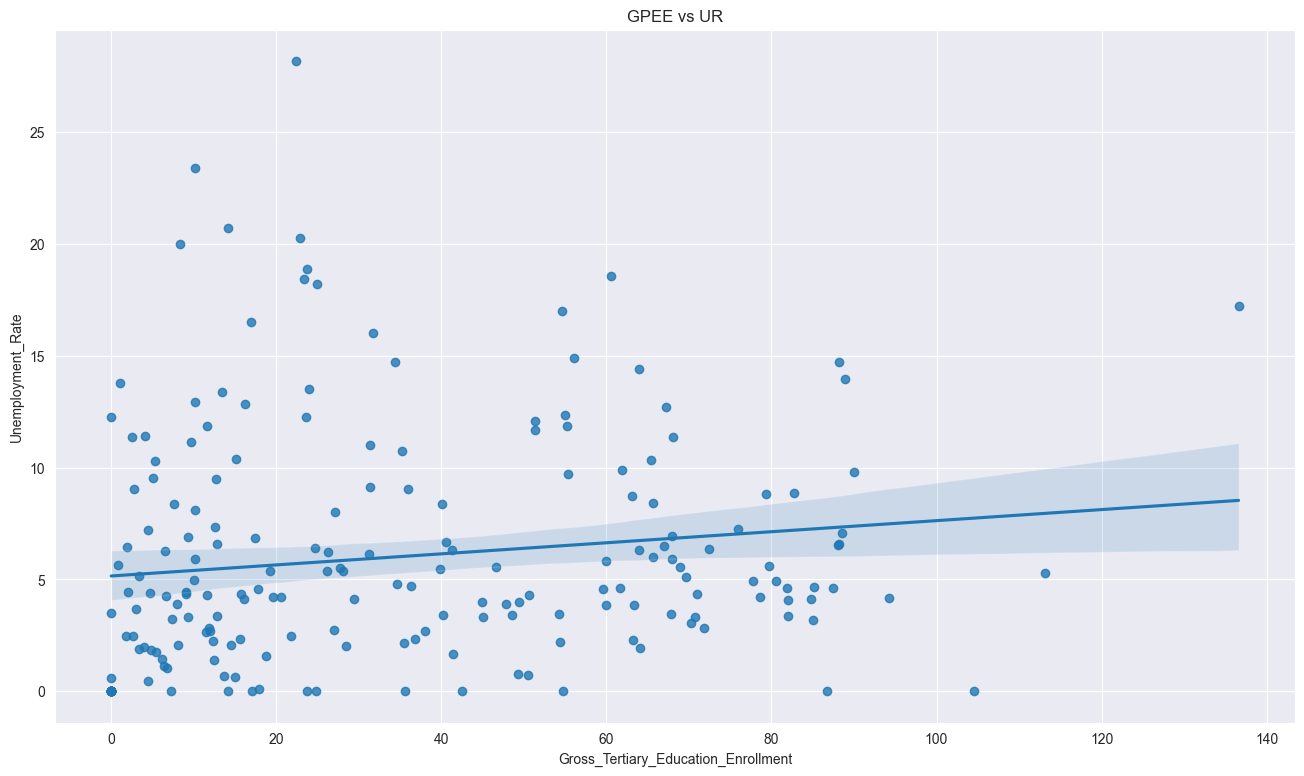

In [10]:
plt.figure(figsize=(16, 9))

sns.set_style('darkgrid')
sns.regplot(x='Gross_Tertiary_Education_Enrollment', y ='Unemployment_Rate', data=dataset)
plt.title("GPEE vs UR")

plt.show()

In [11]:
average_unemployment_rate = dataset.groupby('Countries and areas')['Unemployment_Rate'].mean()
average_unemployment_rate

Countries and areas
Afghanistan    11.12
Albania        12.33
Algeria        11.70
Andorra         0.00
Angola          6.89
               ...  
Venezuela       8.80
Vietnam         2.01
Yemen          12.91
Zambia         11.43
Zimbabwe        4.95
Name: Unemployment_Rate, Length: 202, dtype: float64

In [24]:
def literacy_rate_difference(group):
    return group['Youth_15_24_Literacy_Rate_Male'].mean() - group['Youth_15_24_Literacy_Rate_Female'].mean()

literacy = dataset.groupby('Countries and areas').apply(literacy_rate_difference)
literacy

Countries and areas
Afghanistan    18.0
Albania        -1.0
Algeria         1.0
Andorra         0.0
Angola          0.0
               ... 
Venezuela       0.0
Vietnam         0.0
Yemen           0.0
Zambia          1.0
Zimbabwe        0.0
Length: 202, dtype: float64

<Axes: ylabel='Unemployment_Rate'>

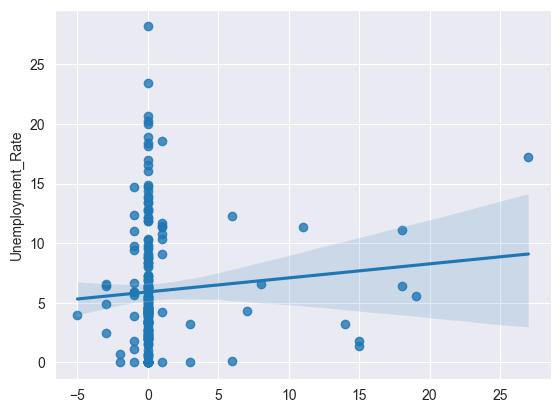

In [25]:
sns.regplot(x = literacy, y = dataset['Unemployment_Rate'])

In [27]:
literacy = literacy[lambda x: x != 0.0]
literacy.sort_values(ascending=False)

Countries and areas
Guinea                      27.0
Central African Republic    19.0
Benin                       18.0
Afghanistan                 18.0
Niger                       15.0
Mali                        15.0
Nigeria                     14.0
Ivory Coast                 11.0
Sierra Leone                 8.0
Burkina Faso                 7.0
Republic of the Congo        6.0
Cameroon                     6.0
India                        3.0
Nepal                        3.0
South Sudan                  1.0
Suriname                     1.0
Morocco                      1.0
Madagascar                   1.0
Zambia                       1.0
Ghana                        1.0
Algeria                      1.0
Bahrain                      1.0
Eritrea                      1.0
Vanuatu                     -1.0
Uganda                      -1.0
Tonga                       -1.0
Thailand                    -1.0
Argentina                   -1.0
Seychelles                  -1.0
Paraguay               

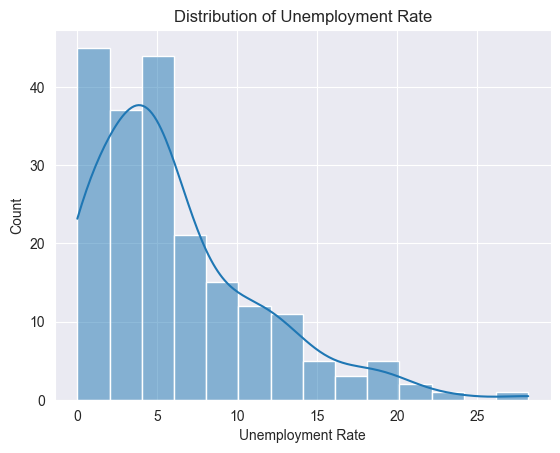

In [28]:
sns.histplot(dataset['Unemployment_Rate'], kde=True)
plt.title('Distribution of Unemployment Rate')
plt.xlabel('Unemployment Rate')
plt.show()

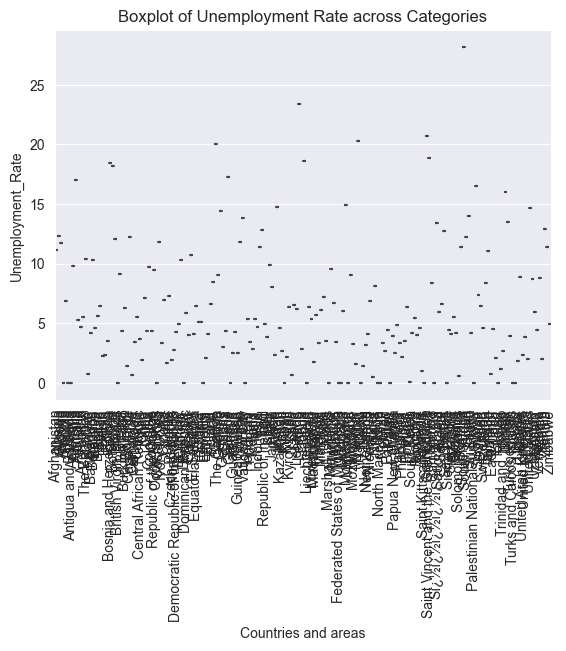

In [30]:
sns.boxplot(x='Countries and areas', y='Unemployment_Rate', data=dataset)
plt.xticks(rotation=90)
plt.title('Boxplot of Unemployment Rate across Categories')
plt.show()